In [3]:
#importing the frameworks

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
#Data Retrieval and Collection

housing = pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/20240319120216/housing.csv")  #loading the california housing dataset csv file
housing.shape #displays the shape of the dataset

(20640, 10)

In [5]:
#Data Cleaning

housing.info() #displays all the column names with the missing value if present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Missing values treatment:
The dataset was checked for missing values before model training. Since Linear Regression in scikit-learn doesnot support missing values, any missing entries were handled during preprocessing. Missing values in the input feature were replaced using median imputation, which preserves all observations and is robust to outliers. This ensured the dataset contained no NaN values before fitting the model.


In [6]:
#Feature Design

X = housing[['housing_median_age']]  #selecting housing_median_age as the only input features with separate features(X) and label(y)

# Label
y = housing['median_house_value']

Housing_median_age was chosen as the sole input feature to build a simple and interpretable Linear Regression model. Using a single feature allows for easier understanding of the relationship between housing age and median house value, reduces model complexity, and helps demonstrate the fundamental behavior of linear regression without the influence of additional variables.

In [7]:
#Algorithm Selection

from sklearn.linear_model import LinearRegression 
model = LinearRegression() #choosing Linear Regression
model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Linear Regression is appropriate for predicting the California housing dataset for the following reasons:

- Continuous target variable: The dataset aims to predict median house value, which is a continuous numerical variable. Linear Regression is designed specifically for this type of prediction task.

- Approximately linear relationships: Several features in the California housing dataset (such as median income, housing age, and population-related variables) show an approximately linear relationship with house prices, making Linear Regression a reasonable modeling choice.

- Interpretability: Linear Regression allows clear interpretation of how each feature affects house prices. The learned coefficients quantify the contribution of each input variable, which is valuable for understanding housing market trends.

- Baseline modeling: It provides a strong baseline model against which more complex models (e.g., decision trees, random forests, or neural networks) can be compared. This helps evaluate whether added complexity is justified.

- Scalability and efficiency: Linear Regression is computationally efficient and scales well to large datasets like the California housing dataset.

- Well-behaved data: After basic preprocessing (handling missing values and feature scaling if needed), the dataset satisfies the assumptions of Linear Regression reasonably well.

Conclusion:
Linear Regression is suitable for the California housing dataset because it matches the continuous prediction goal, captures key linear trends in the data, offers interpretability, and serves as an effective baseline before exploring more advanced models.

In [8]:
#Loss Function Selection

from sklearn.metrics import mean_squared_error #fetching MSE
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred) 
print("Mean Squared Error (MSE):", mse)  

Mean Squared Error (MSE): 13166951184.561146


Mean Squared Error (MSE) was used to evaluate the Linear Regression model. MSE measures the average squared difference between the actual house values and the predicted values. It penalizes larger errors more heavily, making it suitable for assessing regression performance on the California housing dataset.

In [9]:
#Model Learning (Training)

from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
# Create the model
model = LinearRegression()

# Train (fit) the model on the training data
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Here’s a clear, step-by-step explanation of the learning process for training the Linear Regression model on your dataset:

- Data Preparation

The feature (X_train) and label (y_train) were separated from the California housing dataset.

Missing values were handled (e.g., using median imputation or confirming no missing values existed).

The dataset was split into training (80%) and testing (20%) sets to evaluate generalization.

- Model Selection

Linear Regression was chosen because:

The target (median_house_value) is continuous.

There is an approximately linear relationship between housing_median_age and house value.

It provides interpretable coefficients.

- Training (Fitting the Model)

The Linear Regression model learned a line that best fits the training data by minimizing the sum of squared errors between actual and predicted house values.


- Outcome of Learning

The model outputs the coefficient and intercept, which describe the linear relationship:

The coefficient indicates the average change in house value for each additional year of housing age.

The intercept indicates the predicted house value when housing age is 0.

- Model Evaluation

After training, the model’s performance is evaluated on the test set using MSE to measure prediction accuracy on unseen data.

In [11]:
# Model Interpretation

# Coefficient (slope) for housing_median_age
slope = model.coef_[0]

# Intercept
intercept = model.intercept_

print(f"Coefficient (slope) for housing_median_age: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

Coefficient (slope) for housing_median_age: 951.46
Intercept: 179975.00


In our Linear Regression model, the coefficient represents the rate of change of the target variable with respect to the feature.

In our LInear Regression model, the intercept gives the baseline house value, and the coefficient adjusts that value up or down depending on the house’s age.

In [12]:
#Model Evaluation

y_pred = model.predict(X_test) # Display the result
mse_test = mean_squared_error(y_test, y_pred) # Calculate Mean Squared Error
print(f"Mean Squared Error (MSE) on the test data: {mse_test:.2f}") # report the result


Mean Squared Error (MSE) on the test data: 12939617265.10


The reported MSE indicates the average squared difference between the predicted and actual house values. A higher MSE means the model’s predictions deviate significantly from actual values, suggesting that using only housing_median_age is too simplistic to accurately predict California housing prices.

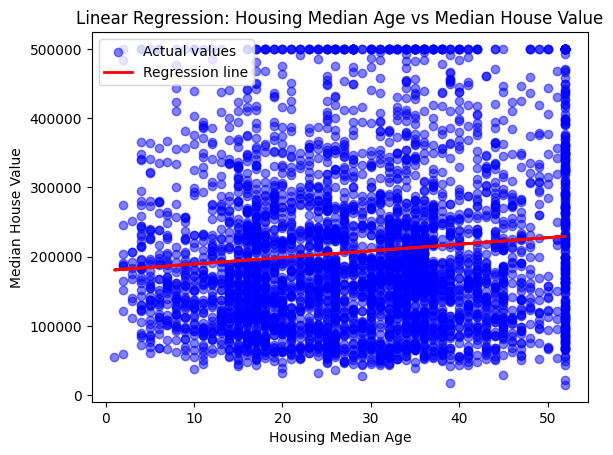

In [13]:
# Scatter plot of the test data
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual values')

# Regression line (predicted values)
y_pred_line = model.predict(X_test)
plt.plot(X_test, y_pred_line, color='red', linewidth=2, label='Regression line')

# Labels and title
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.title('Linear Regression: Housing Median Age vs Median House Value')
plt.legend()
plt.show()

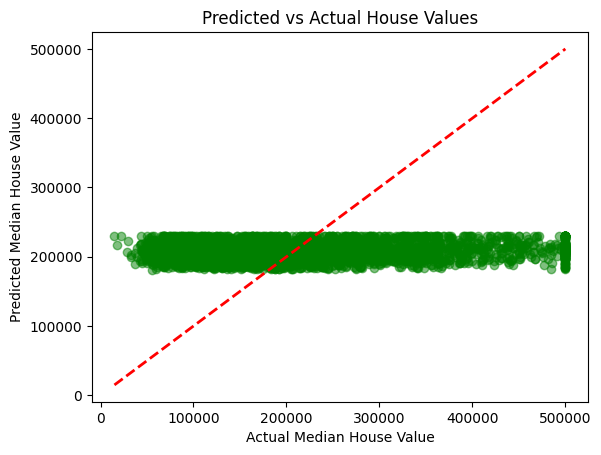

In [14]:
# Predict on the test set
y_pred = model.predict(X_test)

# Scatter plot of predicted vs actual values
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # 45-degree line

# Labels and title
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Predicted vs Actual House Values')
plt.show()

A clear discussion of the assumptions of Linear Regression and how they relate to California housing model:

- Linearity

Assumption: The relationship between the input feature(s) and the target is linear.

In model: Using housing_median_age assumes a roughly straight-line relationship with median_house_value. If the true relationship is non-linear, predictions may be inaccurate.

- Independence of errors

Assumption: The residuals (differences between actual and predicted values) are independent of each other.

In model: Each house observation is treated independently. Spatial or neighborhood effects could violate this assumption, but for a simple model, it’s reasonable.

- Homoscedasticity (constant variance of errors)

Assumption: The variance of residuals is constant across all levels of the input feature.

In model: If residuals grow larger or smaller with housing_median_age, this assumption is violated, which can affect confidence intervals and predictions.

- Normality of errors

Assumption: The residuals are normally distributed.

In model: Linear Regression itself does not require normal inputs, but normal residuals are important for reliable hypothesis tests and confidence intervals.

- No multicollinearity (for multiple features)

Assumption: Input features are not highly correlated with each other.

In model: Only one feature is used, so multicollinearity is not an issue.

- No significant outliers

Assumption: Outliers can disproportionately influence the regression line.

In model: Extreme house values could skew the fit since Linear Regression minimizes squared errors.

### Summary:
The assumptions most relevant here are linearity, homoscedasticity, independence, and absence of extreme outliers. Since we are using a single feature, multicollinearity isn’t a concern, but the model may underperform if the true relationship between housing age and house value is non-linear or affected by other features.